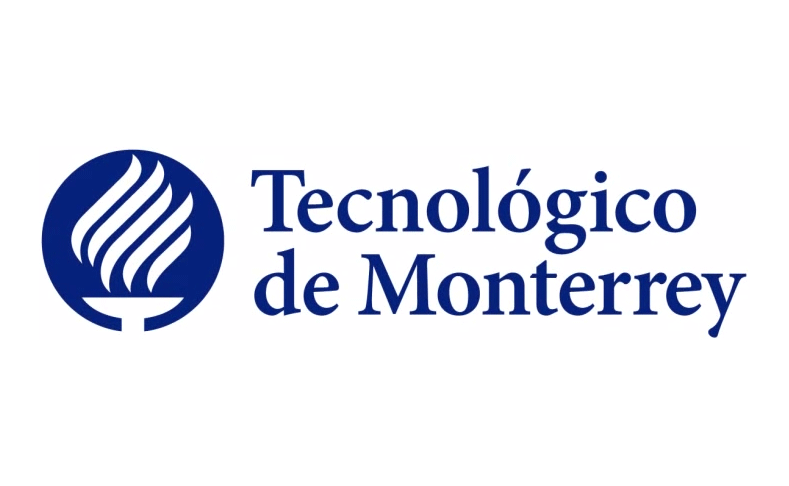

#**Maestría en Inteligencia Artificial Aplicada**

##**Materia:** Proyecto Integrador

**Profesor titular:** Dra. Grettel Barceló Alonso / Dr. Luis Eduardo Falcón Morales



**ASESOR - PROYECTO INTEGRADOR ABR25**  
Dr. Carlos Villaseño

<br><br>
**Equipo 10**  
David García Robles - A01152606  
David Nava Jiménez - A01168501  
José Antonio Hernández Hernández - A01381334  


  

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
df = pd.read_csv('/content/drive/MyDrive/MNA/Proyecto Integrador TC5035.10/Semana 3/NMP Proyecto integrador/ventas.csv', encoding='iso-8859-1', low_memory=False)

df.head()

,SUCURSAL,ESTADO_SUCURSAL,CLAVE_OPERACION,OPERACION,PARTIDA,ORIGEN,DESCRIPCION_PARTIDA,GRAMAJE,KILATAJE,AVALUO_COMPLEMENTARIO,...,IVACOM_PASECOM,COM_EXHIBICION,IVACOM_EXHIBICION,INTERES_DEPRECUP,IVAINT_DEPRECUP,FECHA_MAX_DEP_RECUP,FECHA_CARGA,num_particion,imp_minusvalia,imp_cancelacion_int
0,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181615421,SIVA,176231504-1 ANILLO TIPO:DAMA DISEÃO:CABUJON D...,4,14,0,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
1,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616741,MIDAS,174275433-1 ANILLO ORO AMARILLO 14K PESO 1.60 ...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
2,1005,CIUDAD DE MÃXICO,VP,Venta al Publico,181616743,MIDAS,173896016-1 MEDIA CHURUMBELA ORO AMARILLO 14K...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
3,16,AGUASCALIENTES,VP,Venta al Publico,181662772,SIVA,1 COLLAR TIPO:ROSARIO DISEÃO:ESFERAS LISAS D...,23.9,10,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN
4,278,CIUDAD DE MÃXICO,VP,Venta al Publico,181809632,SIVA,1 ACCESORIOS TIPO:LLAVERO DISEÃO:GRABADO DE O...,12.4,8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-03T05:01:25.637Z,202405.0,NaN,NaN


**Intepretacion del DataFrame**
Durante la carga del archivo CSV, se detecto que algunos caracteres especiales como acentos y simbolos fueron mal interpretados, generando valores con caracteres especiales. Aunque el archivo original estaba en UTF-8 al utilizar pandas.read se forzo a na codificacion alternativa que fue Latin-1.

In [21]:
print("Número de filas:", df.shape[0])                                           # Imprimir numero de filas
print("Número de columnas:", df.shape[1])                                        # Imprimir numero de columnas

Número de filas: 1048575
Número de columnas: 64


#**Valores Faltantes**

In [22]:
df.info()                                                                        # Imprimir información del conjunto de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 64 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SUCURSAL                   1048533 non-null  object 
 1   ESTADO_SUCURSAL            1048538 non-null  object 
 2   CLAVE_OPERACION            1048516 non-null  object 
 3   OPERACION                  1048511 non-null  object 
 4   PARTIDA                    1048516 non-null  object 
 5   ORIGEN                     1048516 non-null  object 
 6   DESCRIPCION_PARTIDA        1048436 non-null  object 
 7   GRAMAJE                    941340 non-null   object 
 8   KILATAJE                   866459 non-null   object 
 9   AVALUO_COMPLEMENTARIO      915717 non-null   object 
 10  FACTOR_HECHURA             941352 non-null   object 
 11  FACTOR                     941343 non-null   object 
 12  VALOR_MONTE                1048243 non-null  object 
 13  VALOR_MONTE_

Podemos observar que todas las columnas tienen tipo de dato "object", por lo que en la etapa de preprocesamiento vamos a modificarlas de acuerdo con el tipo de dato que se utiliza en el negocio

In [23]:
print("\n Valores faltantes;\n", df.isnull().sum())                               # Imprimir valores faltantes
missing_percentage = df.isnull().sum() / len(df) * 100                            # Imprimir porcentaje de valores faltantes
print("\n Porcentaje de valores faltantes;\n", missing_percentage)


 Valores faltantes;
 SUCURSAL                    42
ESTADO_SUCURSAL             37
CLAVE_OPERACION             59
OPERACION                   64
PARTIDA                     59
                        ...   
FECHA_MAX_DEP_RECUP     376751
FECHA_CARGA                487
num_particion              496
imp_minusvalia         1048575
imp_cancelacion_int    1048575
Length: 64, dtype: int64

 Porcentaje de valores faltantes;
 SUCURSAL                 0.004005
ESTADO_SUCURSAL          0.003529
CLAVE_OPERACION          0.005627
OPERACION                0.006104
PARTIDA                  0.005627
                          ...    
FECHA_MAX_DEP_RECUP     35.929810
FECHA_CARGA              0.046444
num_particion            0.047302
imp_minusvalia         100.000000
imp_cancelacion_int    100.000000
Length: 64, dtype: float64


Podemos obervar que existen valores faltantes en las diferentes columnas del dataset que posteriormente en la etapa de ingeniería y transformación de datos vamos a determinar la acción necesaria.

# Análisis Descriptivo (univariante)

De acuerdo con la naturaleza del negocio, se procedió a realizar un análisis de cada variable que conforma el dataset, se identificaron el tipo real de dato que contiene cada columna

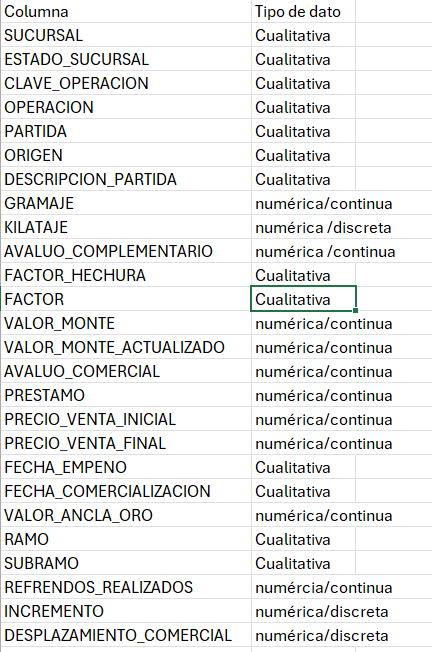

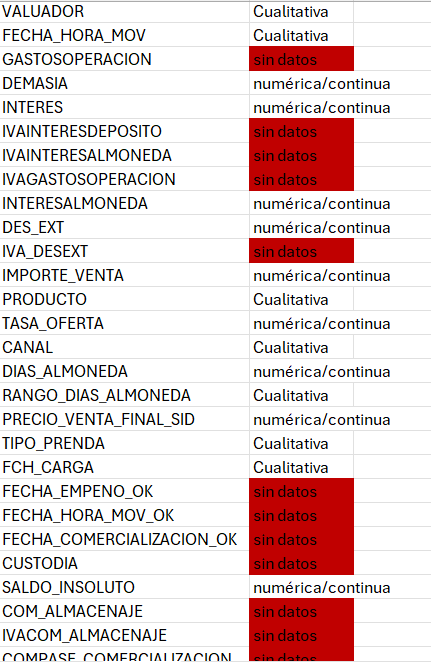

#**Estadísticas resumidas del conjunto de datos**

In [24]:
print("\n Estadisticas numéricas del conjunto de datos;\n")
print(df.describe())                                                             # Imprimir estadisticas numericas del conjunto de datos


 Estadisticas numéricas del conjunto de datos;

       num_particion  imp_minusvalia  imp_cancelacion_int
count   1.048079e+06             0.0                  0.0
mean    2.024072e+05             NaN                  NaN
std     3.158538e+00             NaN                  NaN
min     2.024010e+05             NaN                  NaN
25%     2.024050e+05             NaN                  NaN
50%     2.024070e+05             NaN                  NaN
75%     2.024100e+05             NaN                  NaN
max     2.024120e+05             NaN                  NaN


In [25]:
print("\n Estadisticas categoricas del conjunto de datos;\n")
print(df.describe(include=['O']))                                                # Imprimir estadisticas categoricas del conjunto de datos


 Estadisticas categoricas del conjunto de datos;

       SUCURSAL    ESTADO_SUCURSAL CLAVE_OPERACION         OPERACION  \
count   1048533            1048538         1048516           1048511   
unique      458                163             113               101   
top        1001  CIUDAD DE MÃXICO              VP  Venta al Publico   
freq     107819             313839         1047780           1047780   

                                           PARTIDA   ORIGEN  \
count                                      1048516  1048516   
unique                                     1036647      110   
top     Buen Estado Sin Personalizar / Sin Abollar     SIVA   
freq                                            20   941333   

          DESCRIPCION_PARTIDA GRAMAJE KILATAJE AVALUO_COMPLEMENTARIO  ...  \
count                 1048436  941340   866459                915717  ...   
unique                 934957    4430      151                  3077  ...   
top     BROQUELES  0.1GR  14K       2    

#**Frecuencia de variables categóricas**

In [26]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()                 # Obtener columnas categoricas

for col in cat_cols:                                                             # Imprimir frecuencia de variables categoricas
    print(f"Frecuencia de {col}:")
    print(df[col].value_counts())
    print("\n")


Frecuencia de SUCURSAL:
SUCURSAL
1001                                     107819
0                                         42823
1005                                      13683
28                                        13577
12                                         9061
                                          ...  
Relojes Comerciales - Gama Media Baja         1
0.91                                          1
CO                                            1
0.3849                                        1
GRAMOS 2.2 ....\""                            1
Name: count, Length: 458, dtype: int64


Frecuencia de ESTADO_SUCURSAL:
ESTADO_SUCURSAL
CIUDAD DE MÃXICO                                                                           313839
ESTADO DE MÃXICO                                                                           115442
VERACRUZ                                                                                     92393
JALISCO                                               

#**Cardinalidad de las variables categóricas**

In [27]:
print("\n Cardinalidad de las variables categoricas;\n")
for col in cat_cols:                                                             # Imprimir cardinalidad de variables categoricas
    print(f"Cardinalidad de {col}: {df[col].nunique()}")
    print("\n")


 Cardinalidad de las variables categoricas;

Cardinalidad de SUCURSAL: 458


Cardinalidad de ESTADO_SUCURSAL: 163


Cardinalidad de CLAVE_OPERACION: 113


Cardinalidad de OPERACION: 101


Cardinalidad de PARTIDA: 1036647


Cardinalidad de ORIGEN: 110


Cardinalidad de DESCRIPCION_PARTIDA: 934957


Cardinalidad de GRAMAJE: 4430


Cardinalidad de KILATAJE: 151


Cardinalidad de AVALUO_COMPLEMENTARIO: 3077


Cardinalidad de FACTOR_HECHURA: 159


Cardinalidad de FACTOR: 132


Cardinalidad de VALOR_MONTE: 38714


Cardinalidad de VALOR_MONTE_ACTUALIZADO: 37482


Cardinalidad de AVALUO_COMERCIAL: 41660


Cardinalidad de PRESTAMO: 28458


Cardinalidad de PRECIO_VENTA_INICIAL: 41464


Cardinalidad de PRECIO_VENTA_FINAL: 43238


Cardinalidad de FECHA_EMPENO: 1635


Cardinalidad de FECHA_COMERCIALIZACION: 1382


Cardinalidad de VALOR_ANCLA_ORO: 1514


Cardinalidad de RAMO: 95


Cardinalidad de SUBRAMO: 70


Cardinalidad de REFRENDOS_REALIZADOS: 79


Cardinalidad de INCREMENTO: 115


Cardinalidad


**Interpretación de la Cardinalidad**

Tras el análisis exploratorio, se identificó una amplia variedad de variables categóricas con niveles de cardinalidad alta, media y baja. Destacan variables como TIPO_PRENDA, CANAL y PRODUCTO, las cuales presentan una estructura adecuada y serán clave para los procesos de visualización, segmentación y modelado en etapas posteriores.

En contraste, variables como ESTADO_SUCURSAL presentan una cardinalidad inesperadamente alta (163 categorías). Este comportamiento sugiere posibles problemas de formato en el archivo fuente, ya que conceptualmente esta variable debería contener un máximo de 32 valores únicos (los 31 estados de México más la Ciudad de México). Durante el análisis se detectaron filas que rompen la estructura del DataFrame, desplazando los valores de columna, lo cual confirma la necesidad de un proceso de preprocesamiento y limpieza estructural más riguroso.


#**Valores atípicos**

In [31]:
dicc = {
    'SUCURSAL': 'str',
    'ESTADO_SUCURSAL': 'str',
    'CLAVE_OPERACION': 'str',
    'OPERACION': 'str',
    'PARTIDA': 'str',
    'ORIGEN': 'str',
    'DESCRIPCION_PARTIDA': 'str',
    'GRAMAJE': 'float',
    'KILATAJE': 'str',
    'FACTOR_HECHURA': 'str',
    'FACTOR': 'str',
    'VALOR_MONTE': 'float',
    'VALOR_MONTE_ACTUALIZADO': 'float',
    'AVALUO_COMERCIAL': 'float',
    'PRESTAMO': 'float',
    'PRECIO_VENTA_INICIAL': 'float',
    'PRECIO_VENTA_FINAL': 'float',
    'FECHA_EMPENO': 'datetime',
    'FECHA_COMERCIALIZACION': 'datetime',
    'VALOR_ANCLA_ORO': 'float',
    'RAMO': 'str',
    'SUBRAMO': 'str',
    'REFRENDOS_REALIZADOS': 'float',
    'INCREMENTO': 'int',
    'DESPLAZAMIENTO_COMERCIAL': 'int',
    'VALUADOR': 'str',
    'FECHA_HORA_MOV': 'datetime',
    'DEMASIA':'float',
    'INTERES':'float',
    'INTERESALMONEDA':'float',
    'DES_EXT':'float',
    'IMPORTE_VENTA':'float',
    'PRODUCTO':'str',
    'TASA_OFERTA':'float',
    'CANAL':'str',
    'DIAS_ALMONEDA': 'float',
    'RANGO_DIAS_ALMONEDA': 'str',
    'PRECIO_VENTA_FINAL_SID': 'float',
    'TIPO_PRENDA': 'str',
    'FCH_CARGA': 'datetime',
    'SALDO_INSOLUTO': 'float',
    'FECHA_CARGA': 'datetime'
}

In [32]:
for col, tipo in dicc.items():
  if tipo in ['int', 'float']:                                                         # Manejar valores numericos
    try:
      df[col] = pd.to_numeric(df[col], errors='coerce')                                # Convertir a tipo numerico, invalid values become NaN
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")


  elif tipo == 'datetime':
    try:                                                                               # Manejar fechas
      df[col] = pd.to_datetime(df[col], errors='coerce')                               # Convert to datetime, invalid values become NaT
    except ValueError:
      print(f"Could not convert column '{col}' to {tipo}. Skipping...")
  else:                                                                                # Manejar strings
    df[col] = df[col].astype(tipo)

In [34]:
sample_df = df.sample(10000, random_state=42)                                    # Muestra aleatoria de 10,000 registros


<Axes: >

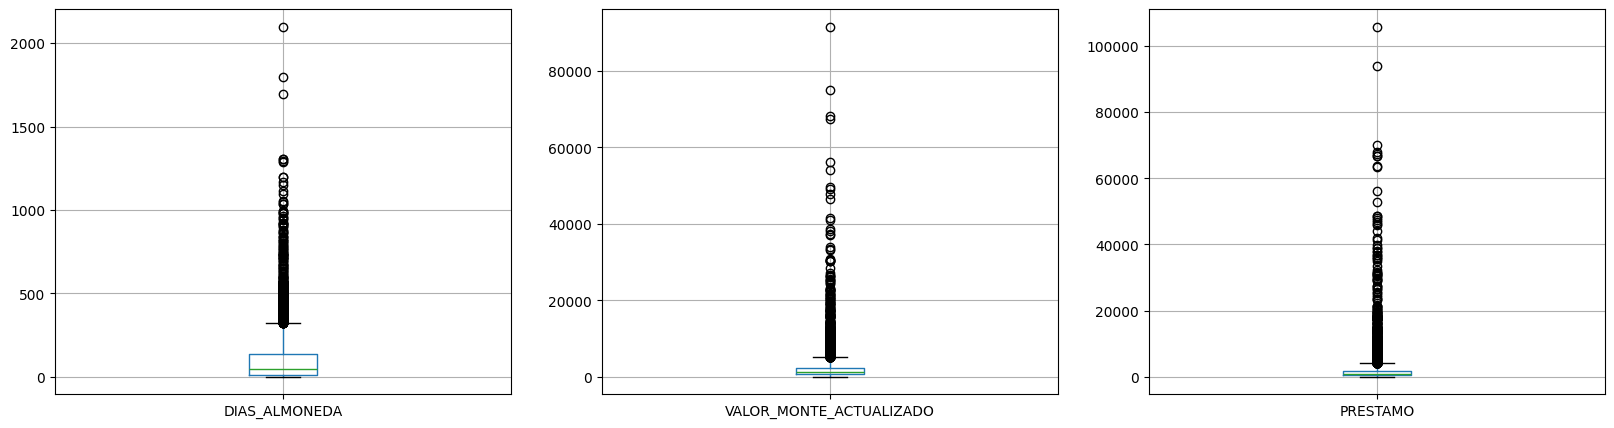

In [35]:
# Create the boxplot
fig, axis = plt.subplots(1,3,figsize=(20,5))
sample_df.boxplot(column=['DIAS_ALMONEDA'],ax=axis[0])
sample_df.boxplot(column=['VALOR_MONTE_ACTUALIZADO'],ax=axis[1])
sample_df.boxplot(column=['PRESTAMO'],ax=axis[2])

Podemos observar que existen bastantes valores atípicos en estas tres variables numéricas que tienen una relevancia importante para el negocio

#Gráficos (histogramas)


In [36]:
sample_df = df.sample(n=10000, random_state=42)

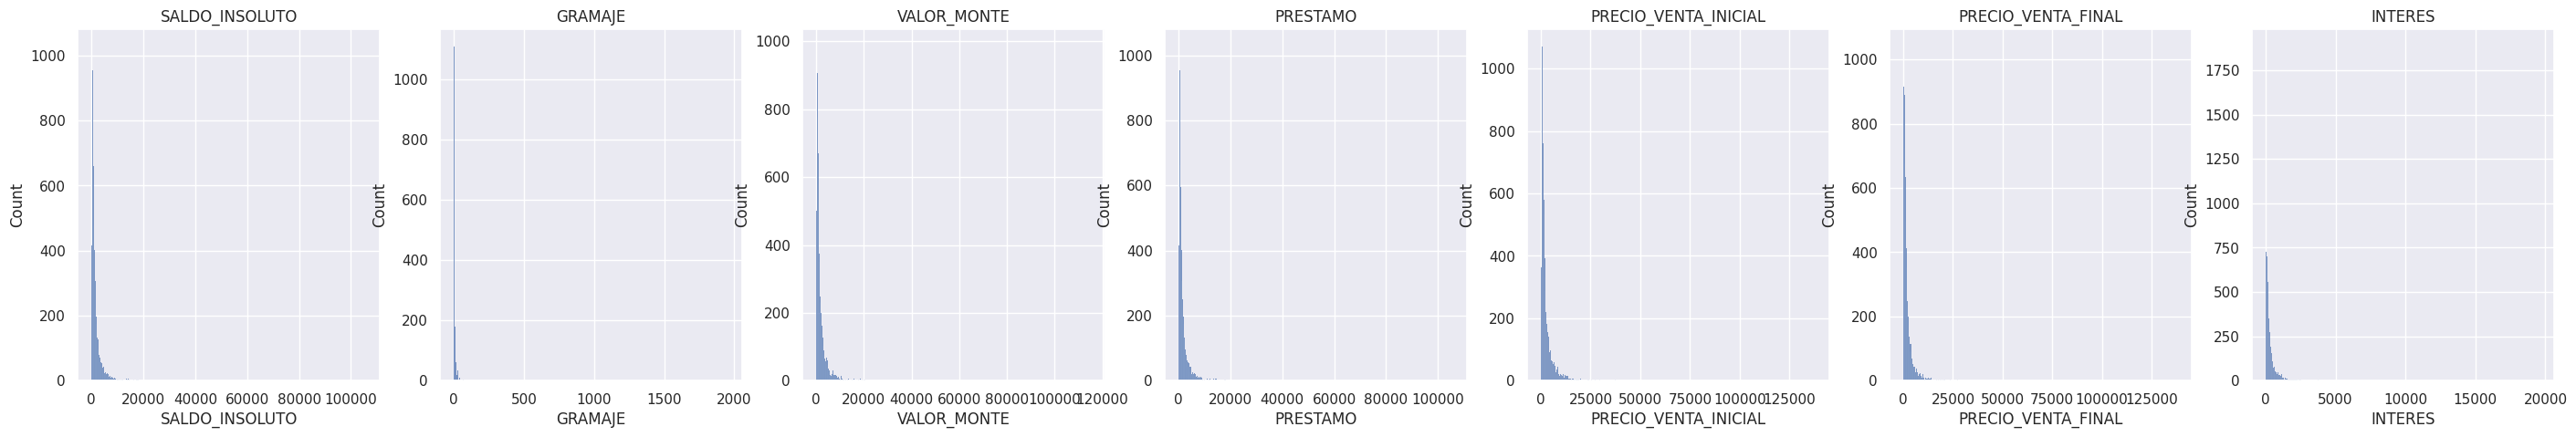

In [37]:
var_list=['SALDO_INSOLUTO','GRAMAJE','VALOR_MONTE','PRESTAMO','PRECIO_VENTA_INICIAL','PRECIO_VENTA_FINAL','INTERES']
sns.set(rc={'figure.figsize':(35,5)})
fig, axes = plt.subplots(1,7)
for ax,var in zip(axes.flatten(),var_list):
    sns.histplot(sample_df[var],ax=ax)
    ax.set_title(var)

plt.show()

Las variables anteriormente analizadas, se transformarán en núméricas (int o float) dependiendo de su naturaleza en la etapa de preprocesamiento. Lo que podemos observar es que la mayoría tienen un sesgo a la derecha, por lo que se tendrían que normalizar con un escalamiento para obtener una distribución más normal que ayude al modelo de machine learning.

Conclusiones del Análisis Exploratorio de Datos (EDA)
A partir del análisis realizado, se identificaron los siguientes hallazgos clave:

Valores faltantes: Se encontraron valores nulos en varias columnas. Se detectaron patrones de ausencia en variables específicas, por lo que se aplicaron estrategias de imputación como el uso de la mediana y/o moda dependiendo del tipo de variable.
Estadísticas generales: Se obtuvo un resumen estadístico que permitió observar distribuciones sesgadas y valores extremos en varias variables numéricas.
Outliers: Se visualizaron valores atípicos utilizando gráficos de caja. Estos fueron analizados y se propuso su tratamiento para no distorsionar el rendimiento del modelo.
Alta cardinalidad: Se revisó la cardinalidad de variables categóricas. Algunas variables mostraron niveles excesivos, por lo que se consideró agrupar categorías infrecuentes en una categoría "Otros".
Distribuciones sesgadas: Algunas variables numéricas presentaban asimetría significativa. Se consideró aplicar transformaciones logarítmicas para normalizar su distribución.
Correlaciones: Se detectaron correlaciones relevantes entre ciertas variables predictoras, lo que permite reducir la dimensionalidad eliminando variables redundantes.
Desequilibrio de clases: En caso de variables objetivo categóricas, se observó un desequilibrio que deberá abordarse con técnicas de re-muestreo en etapas posteriores.
Este análisis permitió seleccionar las características más relevantes, proponer mejoras al set de datos, y establecer las bases para una futura generalización del modelo.